In [5]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://raw.githubusercontent.com/GuySuphakit/Heart-Failure-Prediction/main/heart.csv"
heart = pd.read_csv(url)

# Check columns
print("Columns in dataset:", heart.columns)

# Target column is 'HeartDisease'
X = heart.drop("HeartDisease", axis=1)  # Features
y = heart["HeartDisease"]               # Target

# Check for categorical columns
cat_cols = X.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Encode categorical columns (if any)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("✅ Dataset prepared successfully!")


Columns in dataset: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
✅ Dataset prepared successfully!


In [ ]:
#Decision Tree Models
# Default Decision Tree
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_dt_default = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc_dt_default)

# Entropy-based Decision Tree with depth=4
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=1)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
acc_dt_entropy = accuracy_score(y_test, y_pred2)
print("Decision Tree (Entropy, depth=4) Accuracy:", acc_dt_entropy)

# Smaller Decision Tree (depth=3)
clf_small = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
clf_small.fit(X_train, y_train)
y_pred_small = clf_small.predict(X_test)
acc_dt_small = accuracy_score(y_test, y_pred_small)
print("Small Tree Accuracy:", acc_dt_small)


Decision Tree Accuracy: 0.7644927536231884
Decision Tree (Entropy, depth=4) Accuracy: 0.8695652173913043
Small Tree Accuracy: 0.8333333333333334


In [ ]:
#SVM Models
# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_svm_rbf = accuracy_score(y_test, y_pred_rbf)
print("\nSVM (RBF Kernel) Accuracy:", acc_svm_rbf)
print("Classification Report (RBF):\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))

# Linear Kernel
svm_linear = SVC(kernel='linear', C=1, random_state=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_svm_linear = accuracy_score(y_test, y_pred_linear)
print("\nSVM (Linear Kernel) Accuracy:", acc_svm_linear)



SVM (RBF Kernel) Accuracy: 0.717391304347826
Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.61      0.77      0.68       109
           1       0.82      0.68      0.75       167

    accuracy                           0.72       276
   macro avg       0.72      0.73      0.71       276
weighted avg       0.74      0.72      0.72       276

Confusion Matrix (RBF):
 [[ 84  25]
 [ 53 114]]

SVM (Linear Kernel) Accuracy: 0.8695652173913043


In [ ]:
#Comparison
models = [
    "Decision Tree (default)",
    "Decision Tree (Entropy, depth=4)",
    "Decision Tree (Small, depth=3)",
    "SVM (RBF Kernel)",
    "SVM (Linear Kernel)"
]

accuracies = [acc_dt_default, acc_dt_entropy, acc_dt_small, acc_svm_rbf, acc_svm_linear]

# Print comparison table
print("\nModel Comparison:")
for model, acc in zip(models, accuracies):
    print(f"{model}: {acc:.4f}")



Model Comparison:
Decision Tree (default): 0.7645
Decision Tree (Entropy, depth=4): 0.8696
Decision Tree (Small, depth=3): 0.8333
SVM (RBF Kernel): 0.7174
SVM (Linear Kernel): 0.8696


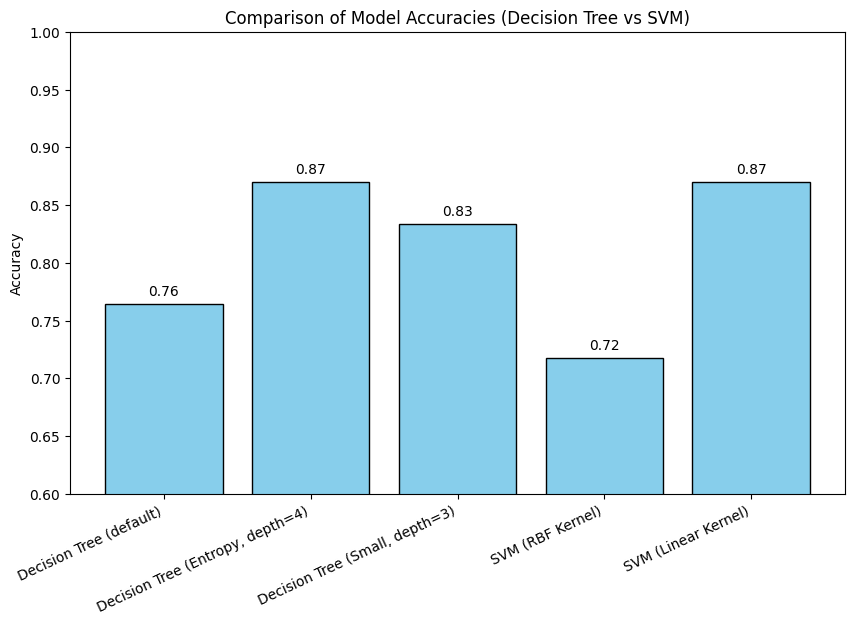

In [ ]:
#Visualization 
plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom')

# Formatting
plt.title("Comparison of Model Accuracies (Decision Tree vs SVM)")
plt.ylabel("Accuracy")
plt.xticks(rotation=25, ha='right')
plt.ylim(0.6, 1.0)

plt.show()


c:\Users\lilha\OneDrive\Pictures\Desktop\5th-sem-Practicals\VirtualEnviorment\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


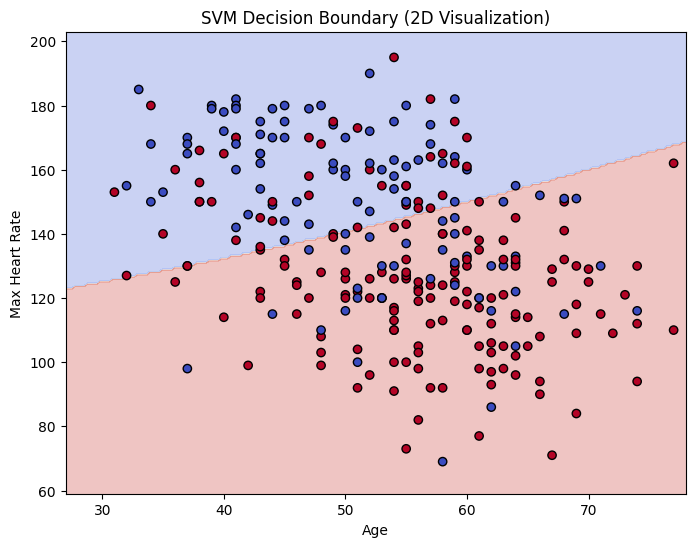

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Select two features for visualization
X_vis = heart[['Age', 'MaxHR']]
y_vis = heart['HeartDisease']

# Train-test split for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=1)

# Train SVM on 2D data
svm_vis = SVC(kernel='rbf', C=1, gamma='scale', random_state=1)
svm_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid for decision boundary
x_min, x_max = X_vis['Age'].min() - 1, X_vis['Age'].max() + 1
y_min, y_max = X_vis['MaxHR'].min() - 1, X_vis['MaxHR'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_vis['Age'], X_test_vis['MaxHR'], c=y_test_vis, cmap='coolwarm', edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("SVM Decision Boundary (2D Visualization)")
plt.show()
